In [14]:
import numpy as np
import numpy.random as rd
import scipy.stats as st
import copy, time, os
from datetime import datetime as dt

import matplotlib.cm as cm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)

In [15]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

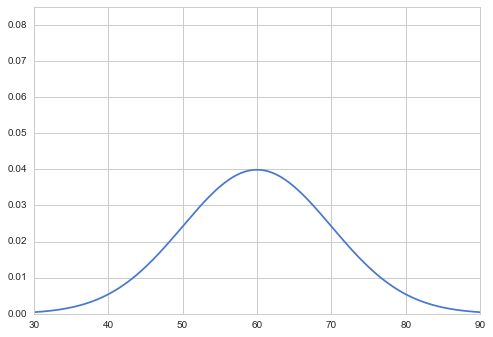

In [3]:
@interact(mu=(30,90,5), sd=(5,20,2))
def draw_norm_dist(mu=60, sd=10):   
    xx = np.linspace(30,90,301)
    yy = st.norm.pdf(xx, mu, sd)
    plt.ylim(0, .085)
    plt.plot(xx,yy)

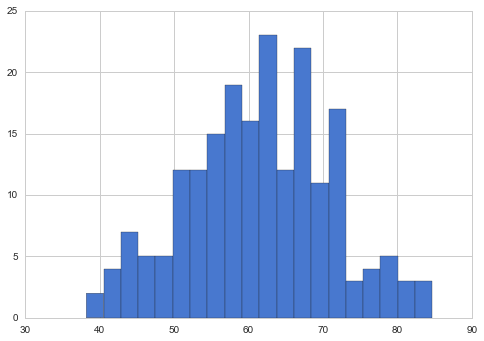

In [6]:
mu = 60
sd = 10
x = rd.normal(mu, sd, size=200)
plt.hist(x, bins=20)
plt.show()


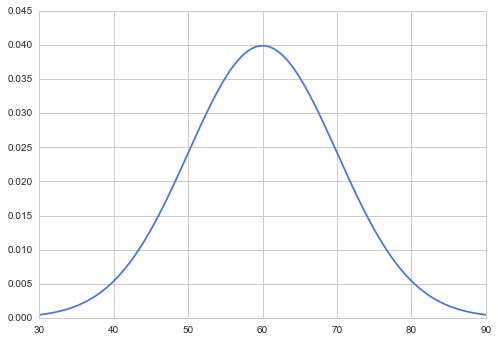

In [11]:

xx = np.linspace(30,90,301)
yy = st.norm.pdf(xx, mu, sd)
plt.ylim(0, .045)
plt.plot(xx,yy)

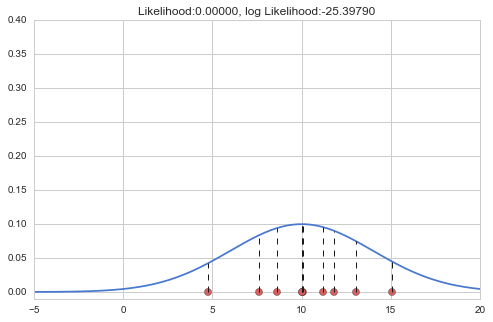

In [13]:

@interact(m=(0,20,1), s=(1,10,1))
def draw_likelihood(m = 5, s = 4):


    def norm_dens(val):
        return (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(val-m)**2/s**2)

    rd.seed(7)
    data = rd.normal(10, 3, 10, )
    min_x = m-4*s
    max_x = m+4*s
    x = np.linspace(min_x, max_x, 201)
    y = norm_dens(x)

    L = np.prod([norm_dens(x_i) for x_i in data])
    l = np.log(L)

    plt.figure(figsize=(8,5))
    plt.xlim(-5, 20)
    plt.ylim(-0.01,0.4)

    # 正規分布の密度関数の描画
    plt.plot(x,y)

    # データ点の描画
    plt.scatter(data, np.zeros_like(data), c="r", s=50)
    for d in data:
        plt.plot([d, d], [0, norm_dens(d)], "k--", lw=1)

    plt.title("Likelihood:{0:.5f}, log Likelihood:{1:.5f}".format(L, l))

    plt.show()

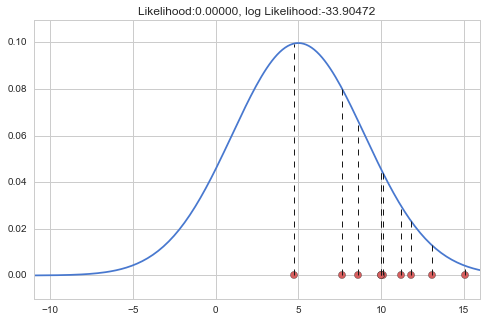

In [8]:
draw_likelihood()